In [1]:
import numpy as np
import pandas as pd
from IPython.display import clear_output
import time

import warnings
warnings.filterwarnings('ignore')

# 데이터 준비 
사용할 데이터의 길이 (seq_length) 설정

In [2]:
df = pd.read_csv('./data/BTC-M.csv',parse_dates=[0], index_col=[0])
df.drop('value',axis=1, inplace=True)
df.head(3)

,open,high,low,close,volume
2018-09-19 23:50:00,7180000.0,7187000.0,7180000.0,7187000.0,0.504830
2018-09-19 23:51:00,7186000.0,7188000.0,7181000.0,7181000.0,0.882076
2018-09-19 23:52:00,7184000.0,7188000.0,7183000.0,7188000.0,0.486359


In [3]:
from pymodule.dllMod import pred_per
pred = pred_per(df, 0.04)

In [4]:
from pymodule.dataMod import OHLCDataset

seq_length = 40
dataset = OHLCDataset(df[10:-4], pred[10:-4], seq_length)

In [5]:
from torch.utils.data import DataLoader, random_split

test_size = 262144
train_set, test_set = random_split(dataset, [len(dataset) - test_size, test_size])
print(f'train dataset length : {len(train_set)}')
print(f'test dataset length : {len(test_set)}')

train_dloader = DataLoader(train_set, batch_size=512, shuffle=True, drop_last=True)
test_dloader = DataLoader(test_set, batch_size=128, shuffle=True, drop_last=True)

train dataset length : 1566774
test dataset length : 262144


# 모델, 옵티마이저, 로스함수 설정

In [6]:
import torch
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f'{device} is available')

cuda:0 is available


In [10]:
from pymodule.models import OLNN
import torch.optim as optim
import torch.nn as nn

model = OLNN(seq_length).to(device)

optimizer = optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.MSELoss()

# 모델 학습

In [11]:
path = "./OLNN.pt"
losses = []
val_losses = []
model = torch.load(path).to(device)

In [12]:
from pymodule.models import fit

start = time.time()
for epoch in range(200):
    epoch_loss = fit(epoch,model,train_dloader, criterion, optimizer, phase = 'train')
    losses.append(epoch_loss)
    val_epoch_loss = fit(epoch, model, test_dloader, criterion, optimizer, phase ='valid')
    val_losses.append(val_epoch_loss)
    print("{:0,.2f}분".format((time.time()-start)/60))
torch.save(model, path)

epoch:0, trainloss is 2.8061090763820505e-07
epoch:0, validloss is 1.2473267490317047e-07
1.52분
epoch:1, trainloss is 3.4886108027621453e-08
epoch:1, validloss is 1.2978142892522762e-07
3.01분
epoch:2, trainloss is 3.452876386207487e-08
epoch:2, validloss is 1.2193316437092427e-07
4.66분
epoch:3, trainloss is 3.377330469893337e-08
epoch:3, validloss is 1.2872754798741448e-07
6.31분
epoch:4, trainloss is 0.003432313518505269
epoch:4, validloss is 6.098705840118512e-06
7.90분
epoch:5, trainloss is 4.929297549834131e-07
epoch:5, validloss is 6.193052709685398e-07
9.45분
epoch:6, trainloss is 1.1009182749966988e-07
epoch:6, validloss is 2.966647886654128e-07
11.02분
epoch:7, trainloss is 5.802329782153178e-08
epoch:7, validloss is 1.722694753774484e-07
12.56분
epoch:8, trainloss is 4.092032241042858e-08
epoch:8, validloss is 1.3689258428900564e-07
14.11분
epoch:9, trainloss is 3.7685657096071705e-08
epoch:9, validloss is 1.3976584149061333e-07
15.68분
epoch:10, trainloss is 3.611648429027965e-08
ep

epoch:84, validloss is 9.032112635365408e-06
134.07분
epoch:85, trainloss is 1.039793535636044e-06
epoch:85, validloss is 1.534401157771148e-06
135.61분
epoch:86, trainloss is 2.531164175348997e-07
epoch:86, validloss is 8.73955007557603e-07
137.13분
epoch:87, trainloss is 1.7161105230331063e-07
epoch:87, validloss is 3.229557526893134e-07
138.60분
epoch:88, trainloss is 0.0310458560238552
epoch:88, validloss is 9.440751446909701e-05
140.07분
epoch:89, trainloss is 9.165175318581812e-06
epoch:89, validloss is 9.607812202494515e-06
141.54분
epoch:90, trainloss is 1.0101174767431591e-06
epoch:90, validloss is 1.297250974058306e-06
143.02분
epoch:91, trainloss is 1.6971059486892633e-07
epoch:91, validloss is 2.8580758559132446e-07
144.55분
epoch:92, trainloss is 0.04998541228431182
epoch:92, validloss is 0.00036767477717347674
146.10분
epoch:93, trainloss is 1.9927929666760486e-05
epoch:93, validloss is 8.191992429407158e-06
147.62분
epoch:94, trainloss is 8.849280802094369e-07
epoch:94, validloss 

epoch:167, trainloss is 0.027822493265101767
epoch:167, validloss is 0.00018141710876662387
257.89분
epoch:168, trainloss is 1.4449072078443276e-05
epoch:168, validloss is 5.5692645153371245e-05
259.40분
epoch:169, trainloss is 5.077027752396859e-06
epoch:169, validloss is 6.853947799589921e-07
260.91분
epoch:170, trainloss is 3.926798826685839e-07
epoch:170, validloss is 4.861236528111434e-07
262.40분
epoch:171, trainloss is 1.5679967426103637e-07
epoch:171, validloss is 3.741025286080335e-07
263.89분
epoch:172, trainloss is 0.14459661843476773
epoch:172, validloss is 0.00011475833500185217
265.39분
epoch:173, trainloss is 1.5157751011580448e-05
epoch:173, validloss is 3.1210296532968584e-05
266.86분
epoch:174, trainloss is 4.312414542976167e-06
epoch:174, validloss is 8.185789738712757e-06
268.31분
epoch:175, trainloss is 2.864519752842799e-06
epoch:175, validloss is 3.375075306233377e-06
269.79분
epoch:176, trainloss is 0.09857338876326614
epoch:176, validloss is 0.0003102847714018253
271.27

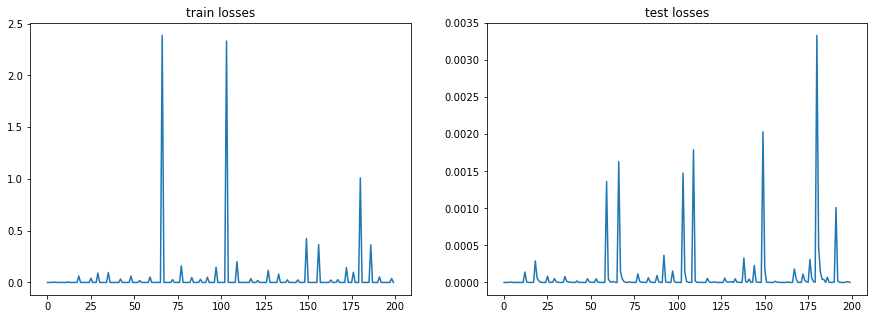

In [13]:
import matplotlib.pyplot as plt
f,ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(losses)
ax[0].set_title('train losses')

ax[1].plot(val_losses)
ax[1].set_title('test losses')
plt.show()

In [14]:
import pickle
with open("ol_train", "wb") as fp:
    pickle.dump(losses,fp)
with open("ol_test", "wb") as fp:
    pickle.dump(val_losses, fp)

In [15]:
with open("ol_train", "rb") as fp:
    loss = pickle.load(fp)
with open("ol_test", "rb") as fp:
    val_loss = pickle.load(fp)

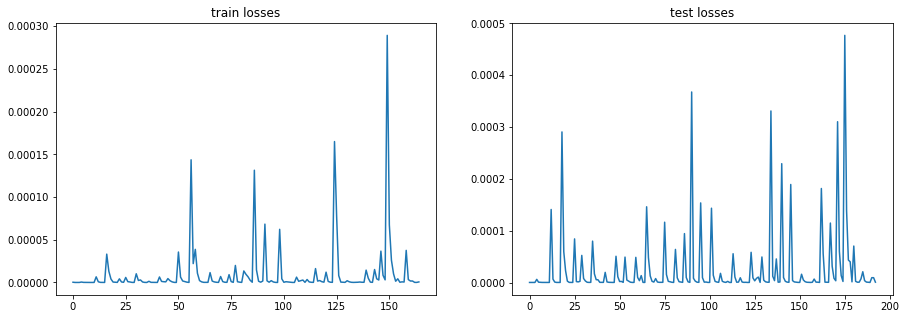

In [25]:
def oddval(x):
    return x<0.0005

f,ax = plt.subplots(1,2, figsize=(15,5))

results = list(filter(oddval,loss))
ax[0].plot(results)
ax[0].set_title('train losses')


results = list(filter(oddval, val_loss))
ax[1].plot(results)
ax[1].set_title('test losses')
plt.show()